##Pre-processing

In [2]:
!pip install -q kaggle
!pip install -q patool

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import requests
from PIL import Image
from io import BytesIO
import random
import pickle
from sklearn.model_selection import train_test_split
import patoolib

# Data visualization
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf

# Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Scaling data
from sklearn.preprocessing import StandardScaler
# Classification Report
from sklearn.metrics import classification_report
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from google.colab import files

In [ ]:
## THIS WILL TRIGGER A UPLOAD BUTTON LOOKING FOR THE KAGGLE KEY
# get api key from kaggle
# upload kaggle.json that was generated from kaggle
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d rishikeshkonapure/sports-image-dataset/
! mkdir kaggle_data
! unzip /content/sports-image-dataset.zip -d kaggle_data

In [5]:
categories = ["badminton", "baseball", "basketball", "boxing",
                "chess", "cricket", "fencing", "football", "formula1",
                "gymnastics", "hockey", "ice_hockey", "kabaddi", "motogp",
                "shooting", "swimming", "table_tennis", "tennis", "volleyball",
                "weight_lifting", "wrestling", "wwe"]

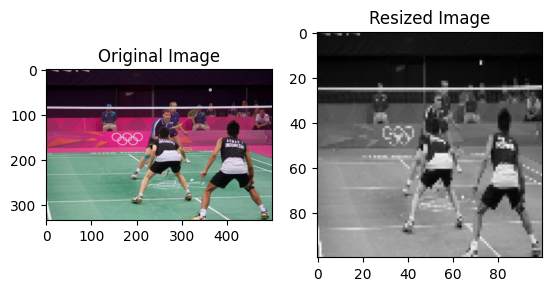

In [ ]:
# Display the original and resized images for the first row
plt.subplot(1, 2, 1)
plt.imshow(covert_to_rgb(df['img_raw'][0]))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(resized_img_grey[0], cmap='gray')
plt.title('Resized Image')

plt.show()

In [ ]:
#create training data
training_data_raw = []
img_size = 100

def create_training_data():
    for i in categories:

        path = os.path.join(data_dir,i) #create path to sports types
        class_num = categories.index(i) #get the classification (indexing each category)
        for img in os.listdir(path):
            try:
                # Read original images
                img_raw = cv2.imread(os.path.join(path,img))
                img_raw_resized = cv2.resize(img_raw,(img_size,img_size))
                training_data_raw.append([img_raw_resized,class_num])

                # Read images as grayscale
                img_gray = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                img_gray_resized = cv2.resize(img_gray,(img_size,img_size))
                training_data_gray.append([img_gray_resized,class_num])

            except Exception as e:
                pass
    # return (img_raw, img_raw_resized, class_num), (img_gray, img_gray_resized, class_num)

create_training_data()
print("training data size", len(training_data_raw))

training data size 14271


In [ ]:
#shuffle all the training data
random.shuffle(training_data_gray)
for sample in training_data_gray[:2]:
    print(sample) #print first 5

[array([[57, 55, 55, ..., 58, 55, 56],
       [56, 55, 55, ..., 58, 54, 56],
       [56, 55, 56, ..., 58, 54, 57],
       ...,
       [64, 64, 64, ..., 72, 72, 72],
       [62, 62, 62, ..., 73, 72, 72],
       [60, 60, 60, ..., 74, 73, 73]], dtype=uint8), 17]
[array([[ 54,  55,  46, ...,  34,  28,  28],
       [ 53,  51,  49, ...,  45,  32,  36],
       [ 50,  47,  51, ...,  51,  40,  36],
       ...,
       [203, 203, 203, ..., 196, 194, 193],
       [204, 205, 203, ..., 197, 194, 200],
       [206, 203, 202, ..., 198, 193, 197]], dtype=uint8), 10]


In [ ]:
#creating lable and features - for color

x=[] #features
y=[] #label
#y = np.array(y)

for features,label in training_data_raw:
    x.append(features)
    y.append(label)
    np.array((y, label))

print("Before converting into numpy array:")
x = np.array(x).reshape(-1,img_size,img_size,1)
y = np.array(y)


# normalize inputs from 0-255 to 0-1
x = x/255.0

<ipython-input-6-e06565115dbb>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array((y, label))


Before converting into numpy array:


In [ ]:
#creating lable and features - for gray

x_gray=[] #features
y_gray=[] #label
#y = np.array(y)

for features,label in training_data_gray:
    x_gray.append(features)
    y_gray.append(label)
    np.array((y_gray, label))

print("Before converting into numpy array:")
print("X gray (img)", x_gray[0])
print("Y gray (category)", y_gray[0])
x_gray = np.array(x_gray).reshape(-1,img_size,img_size,1)
y_gray = np.array(y_gray)


# normalize inputs from 0-255 to 0-1
x_gray = x_gray/255.0

print("After Normalizing and converting into numpy array:")
print("X shape", x_gray.shape)
print("Y shape", y_gray.shape)

<ipython-input-5-461b541ef4ab>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array((y_gray, label))


Before converting into numpy array:
X gray (img) [[178 178 178 ... 148 145 145]
 [177 177 177 ... 147 145 145]
 [176 176 176 ... 145 145 145]
 ...
 [140 139 139 ...  91  91  90]
 [140 139 139 ...  91  90  89]
 [140 139 139 ...  91  90  88]]
Y gray (category) 0
After Normalizing and converting into numpy array:
X shape (14271, 244, 244, 1)
Y shape (14271,)


## Train Test Split

In [ ]:
#create a split of data for the model fit and training
# train_x,test_x, train_y,test_y = train_test_split(x,y,test_size=0.2)

train_x_gray,test_x_gray, train_y_gray,test_y_gray = train_test_split(x_gray,y_gray,test_size=0.2)

print(type(train_x_gray))
print(type(test_x_gray))
print(train_x_gray.shape)
print(test_x_gray.shape)

In [ ]:
test_y_cat = to_categorical(test_y)
train_y_cat = to_categorical(train_y)
print("one hot encoded for categorial")
print(train_y_cat[1])
print(len(train_y_cat[0]))

##Object Detection

In [ ]:
#Clone yolo 8 and check all dependencies
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.225 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.9/78.2 GB disk)


In [ ]:
#Train YOLO8 model
from ultralytics import YOLO
model = YOLO("yolov8n.yaml")
model = YOLO("yolov8n.pt")
model.train(data="coco128.yaml", epochs=3, verbose=False)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

100%|██████████| 6.23M/6.23M [00:00<00:00, 71.4MB/s]


Ultralytics YOLOv8.0.225 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco128.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=F

100%|██████████| 6.66M/6.66M [00:00<00:00, 79.1MB/s]
Unzipping /content/datasets/coco128.zip to /content/datasets/coco128...: 100%|██████████| 263/263 [00:00<00:00, 3944.83file/s]

Dataset download success ✅ (1.0s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 14.9MB/s]


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

Model summary: 225 layers, 3157200 parameters, 3157184 gradients, 8.9 GFLOPs

Transferred 355/355 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir runs/detect/train', view at http://localhost:6006/
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
WARNING ⚠️ NMS time limit 0.550s exceeded
AMP: checks passed ✅


train: Scanning /content/datasets/coco128/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<00:00, 1877.64it/s]

train: New cache created: /content/datasets/coco128/labels/train2017.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      2.71G      1.152      1.595      1.249        228        640: 100%|██████████| 8/8 [00:06<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.23s/it]

                   all        128        929       0.66      0.527      0.598      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3       2.6G      1.142      1.376      1.218        151        640: 100%|██████████| 8/8 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]

                   all        128        929      0.683      0.539      0.616      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      2.55G       1.15      1.313      1.226        164        640: 100%|██████████| 8/8 [00:01<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        128        929      0.675      0.548      0.632      0.467



3 epochs completed in 0.007 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.225 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.14s/it]


                   all        128        929       0.67      0.549      0.631      0.467
Speed: 0.8ms preprocess, 6.2ms inference, 0.0ms loss, 8.2ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7aa26883b250>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,

In [ ]:
#Test model on images from test dataset
from IPython.display import Image
metrics = model.val()

Ultralytics YOLOv8.0.225 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.13it/s]


                   all        128        929      0.665      0.546      0.625      0.463
Speed: 0.4ms preprocess, 13.5ms inference, 0.0ms loss, 6.4ms postprocess per image
Results saved to runs/detect/train2


In [ ]:
def obj_det(image_path):
  results = model(source=image_path,save=True, save_txt=True, project='runs/detect', name='predict', exist_ok=True)
  N = 12
  img_numb = image_path[-N:]
  return Image(filename='/content/runs/detect/predict/'+img_numb,width=600)

Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels


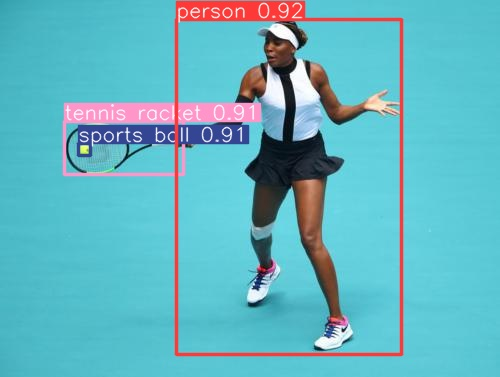

In [ ]:
obj_det('/content/kaggle_data/data/tennis/00000007.jpg')

Results saved to runs/detect/predict
2 labels saved to runs/detect/predict/labels


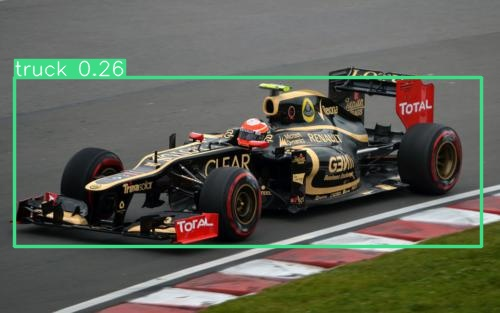

In [ ]:
obj_det('/content/kaggle_data/data/formula1/00000023.jpg')

Results saved to runs/detect/predict
3 labels saved to runs/detect/predict/labels


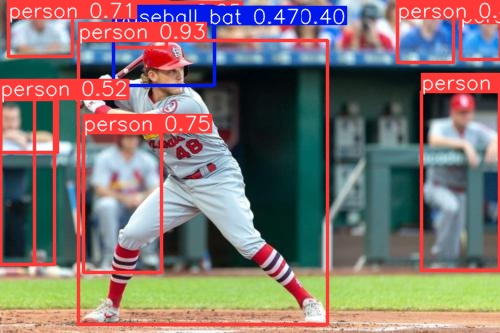

In [ ]:
obj_det('/content/kaggle_data/data/baseball/00000028.jpg')

Results saved to runs/detect/predict
4 labels saved to runs/detect/predict/labels


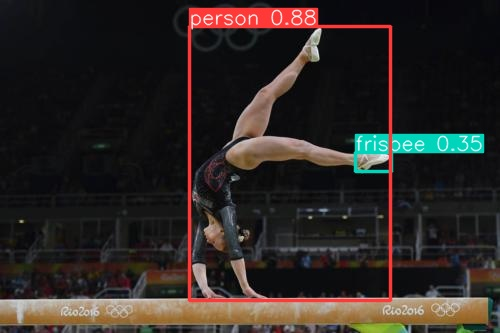

In [ ]:
obj_det('/content/kaggle_data/data/gymnastics/00000055.jpg')

##Building Classification model

Resnet does get rescaled 1/255

efficientNet does not require image rescale

ResNet50 works best with input images of 224 x 224

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
data_dir = '/content/kaggle_data/data'

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                                labels='inferred',
                                                                image_size=IMAGE_SIZE,
                                                                validation_split=0.2,
                                                                label_mode= 'categorical',
                                                                subset="both",
                                                                batch_size=BATCH_SIZE,
                                                                #  color_mode="grayscale"
                                                                seed=58)

print(type(train_ds))
print(train_ds.take(1))
categories = train_ds.class_names

Found 14184 files belonging to 22 classes.
Using 11348 files for training.
Using 2836 files for validation.
<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 22), dtype=tf.float32, name=None))>


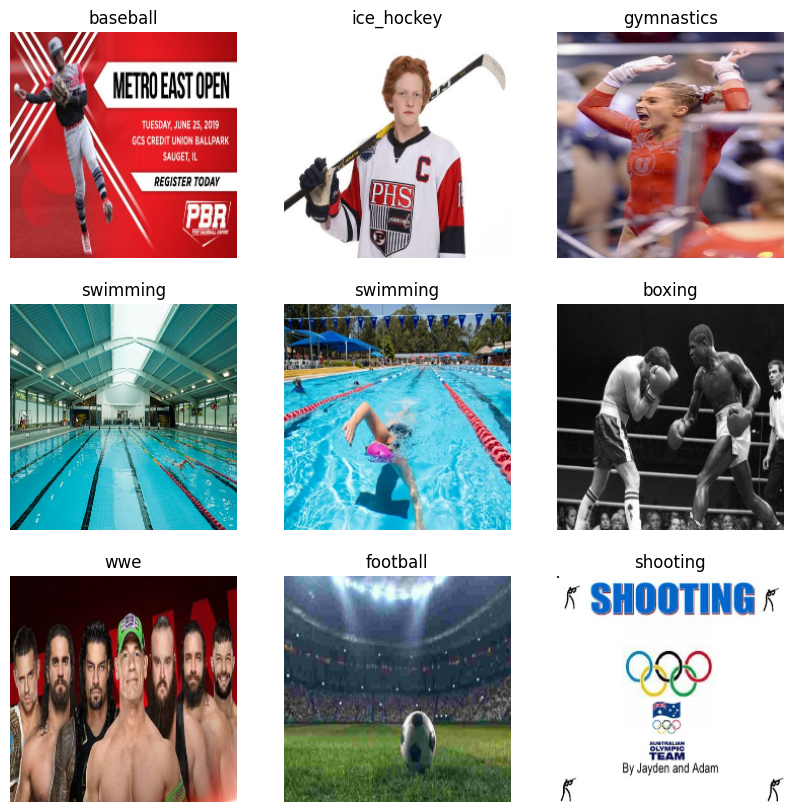

In [7]:
def display_img(train_ds):
  class_names = train_ds.class_names
  plt.figure(figsize=(10, 10))
  for images, labels in train_ds.take(2):
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      image_np = np.array(images[i], dtype=np.float32) / 255.0 # converting to numpy and scaling values
      plt.imshow(image_np)   # Needed to use a converted image
      label_index = tf.argmax(labels[i]).numpy()
      plt.title(class_names[label_index])
      plt.axis("off")

display_img(train_ds)

In [9]:
# Viewing the shape and object of the
print("Dataset Element \n", train_ds.take(1))

for image_batch, labels_batch in train_ds:
  print("image batch size", image_batch.shape)
  print("label batch shape ", labels_batch.shape)
  break

Dataset Element 
 <_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 22), dtype=tf.float32, name=None))>
image batch size (32, 224, 224, 3)
label batch shape  (32, 22)


In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
import tensorflow_hub as hub
from tensorflow.keras import layers

# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

def create_model(model_url, num_classes=len(categories)):
  """
  Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """

  rescaling_layer = layers.Rescaling(1./255, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=(224,224,3)) # define the input image shape

  # Create our own model
  model = tf.keras.Sequential([
    rescaling_layer,
    feature_extractor_layer, # use the feature extraction layer as the
    layers.Dense(128, activation= 'relu'),
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer
  ])

  return model

In [9]:
# Create model
resnet_model = create_model(resnet_url)

# Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

# Fit the model
resnet_history = resnet_model.fit(train_ds,
                                  epochs=5,
                                  steps_per_epoch=len(train_ds),
                                  validation_data=val_ds,
                                  validation_steps=len(val_ds))

Epoch 1/5
355/355 [==============================] - 56s 123ms/step - loss: 0.8792 - accuracy: 0.7429 - val_loss: 0.6424 - val_accuracy: 0.8061
Epoch 2/5
355/355 [==============================] - 44s 122ms/step - loss: 0.3948 - accuracy: 0.8808 - val_loss: 0.6564 - val_accuracy: 0.8117
Epoch 3/5
355/355 [==============================] - 42s 117ms/step - loss: 0.2405 - accuracy: 0.9279 - val_loss: 0.6737 - val_accuracy: 0.8131
Epoch 4/5
355/355 [==============================] - 41s 115ms/step - loss: 0.1442 - accuracy: 0.9612 - val_loss: 0.6869 - val_accuracy: 0.8188
Epoch 5/5
355/355 [==============================] - 41s 116ms/step - loss: 0.0848 - accuracy: 0.9806 - val_loss: 0.7050 - val_accuracy: 0.8233


In [10]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 feature_extraction_layer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 output_layer (Dense)        (None, 22)                2838      
                                                                 
Total params: 23829910 (90.90 MB)
Trainable params: 265110 (1.01 MB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [12]:
resnet_model.save('model_resnet_v2_50.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


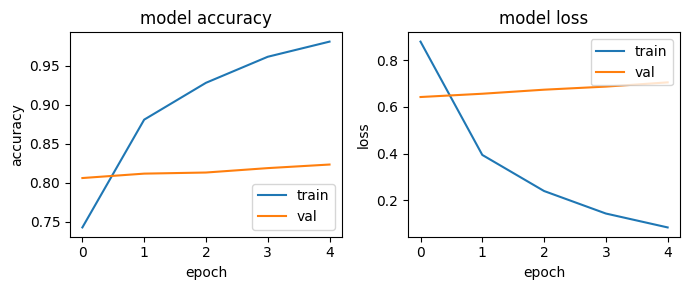

In [13]:
# Draw Learning curve
def learning_curve(hist):
  #Create a function to draw learning curves
  # This will help you to just call this function in future for drawing the learning curves
  plt.figure(figsize=(7, 3))
  plt.subplot(1,2,1)
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='lower right')

  plt.subplot(1,2,2)
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper right')
  plt.tight_layout()
learning_curve(resnet_history)

In [16]:
# Retrieve an Image
index = 10
image_batch, label_batch = next(iter(val_ds.shuffle(buffer_size=BATCH_SIZE).take(index)))
print("image batch shape", image_batch.shape)
image = image_batch[0].numpy()
print("label batch shape", label_batch.shape)
print("label sample", label_batch[0].numpy())
# true_label = categories[np.argmax(label_batch[0].numpy())]
true_label_index = np.argmax(label_batch[0].numpy())
print("true label index:", true_label_index)
true_label = categories[true_label_index]
print("true label:", true_label_index)

# Preprocess the Image
# preprocessed_image = rescaling_layer(image.reshape(1, 240, 240, 3))
preprocessed_image = layers.Rescaling(1./255)(image.reshape(1, 224, 224, 3))

# Make Prediction
predictions = resnet_model.predict(preprocessed_image)
print(predictions.shape)
print(predictions)

# Post-process Predictions
predicted_label_index = np.argmax(predictions)
print("label index", predicted_label_index)
predicted_label = categories[predicted_label_index]
# predicted_label = categories[np.argmax(predictions)]

print("True Label:", true_label)
print("Predicted Label:", predicted_label)

image batch shape (32, 224, 224, 3)
label batch shape (32, 22)
label sample [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
true label index: 16
true label: 16
1/1 [==============================] - 0s 22ms/step
(1, 22)
[[8.0611184e-03 1.3723988e-03 6.3425803e-04 8.1093138e-04 5.6779559e-04
  5.0627342e-03 7.8271806e-01 1.7601938e-03 7.5579830e-04 4.9598143e-03
  3.3875064e-03 7.3716702e-04 2.2453002e-03 2.9492320e-03 2.2462320e-03
  1.7389968e-04 8.4763458e-03 2.4794582e-03 2.5047644e-04 1.6683666e-01
  2.6371488e-03 8.7743520e-04]]
label index 6
True Label: table_tennis
Predicted Label: fencing


In [ ]:
from sklearn.metrics import classification_report

## Save with Pickle

In [ ]:
#Optional Save the x and y

In [ ]:
#dumping data into pickle file
#x_location = '/content/drive/MyDrive/Final_Project_AAI_521/data/x.pickle'
#y_location = '/content/drive/MyDrive/Final_Project_AAI_521/data/y.pickle'

#pickle file for features
#pickle_out = open(x_location,"wb") #path to save pickle file
#pickle.dump(x,pickle_out)
#pickle_out.close()

#pickle file for label
#pickle_out = open(y_location,"wb") #path to save pickle file
#pickle.dump(y,pickle_out)
#pickle_out.close()

In [ ]:
#importing data (pickle) files x and y
#pickle_in = open(x_location,"rb")   #rb - read binary form #wb - Write binary form
#x = pickle.load(pickle_in)


#pickle_in = open(y_location,"rb")   #rb - read binary form #wb - Write binary form
#y = pickle.load(pickle_in)